In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load data dari file hasil feature engineering
df = pd.read_csv("../data/gld_features.csv", index_col='Date', parse_dates=True)

# Fitur dan target
features = ['Open', 'High', 'Low', 'Close', 'Volume',
            'MA5', 'MA10', 'MA20', 'RSI', 'MACD', 'Signal', 'Return', 'Volatility']
X = df[features]
y = df['Target_UpDown']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Gabung oversampling manual
train_df = X_train.copy()
train_df['Target'] = y_train
class_0 = train_df[train_df['Target'] == 0]
class_1 = train_df[train_df['Target'] == 1]

# Oversampling manual
if len(class_0) > len(class_1):
    class_1_oversampled = class_1.sample(len(class_0), replace=True, random_state=42)
    balanced_train = pd.concat([class_0, class_1_oversampled])
else:
    class_0_oversampled = class_0.sample(len(class_1), replace=True, random_state=42)
    balanced_train = pd.concat([class_1, class_0_oversampled])

balanced_train = balanced_train.sample(frac=1, random_state=42)

X_train_balanced = balanced_train.drop(columns='Target')
y_train_balanced = balanced_train['Target']

# Latih ulang model
model = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
model.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)

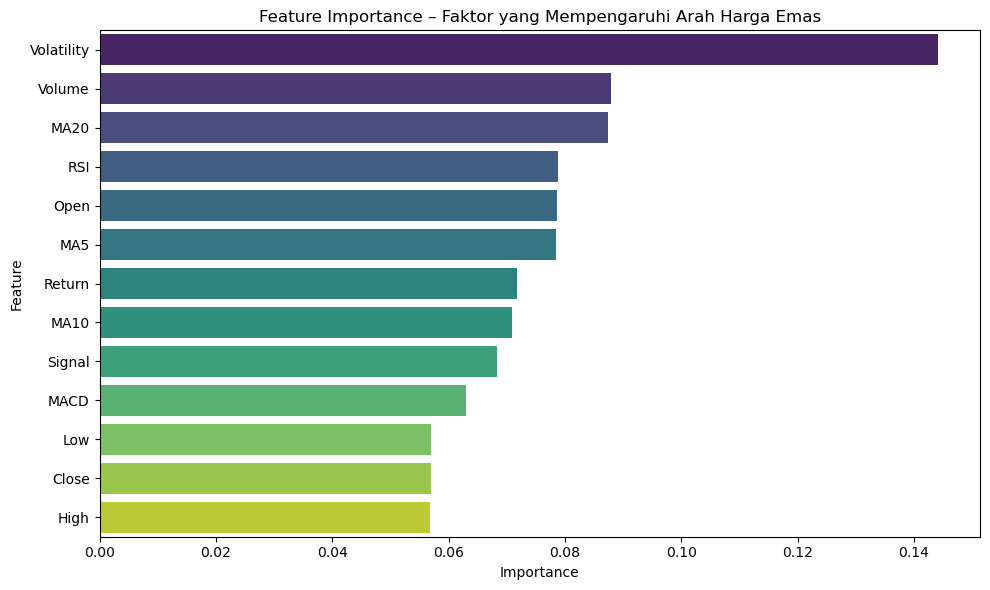

In [3]:
# Lanjutkan visualisasi
importances = model.feature_importances_

feat_importance = pd.DataFrame({
    'Feature': X_train_balanced.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importance, palette='viridis')
plt.title('Feature Importance – Faktor yang Mempengaruhi Arah Harga Emas')
plt.tight_layout()
plt.show()
